In [11]:
library(ggplot2)
library(ggrepel)

In [3]:
toBinary = function (column) {
    column = factor(column, labels = c(1))
    column = as.numeric(column)
    column[is.na(column)] = 0
    return(column)
}

In [4]:
# load data from file
# load data from file
data = read.csv("~/research_data/mozilla_voice_comparison/ppt_data.csv")
wpm = read.csv("~/research_data/mozilla_voice_comparison/voice_metadata.csv")

data = as.data.frame(lapply(data, function (x) if (is.factor(x)) factor(x) else x))

In [5]:
data$rate.experience = ordered(data$rate.experience, levels = c("Excellent", "Good", "OK", "Poor", "Very poor"))
data$voice.easy = toBinary(data$voice.easy)
data$voice.monotone = abs(toBinary(data$voice.monotone) - 1)
data$voice.natural = toBinary(data$voice.natural)
data$voice.no_emotion = abs(toBinary(data$voice.no_emotion) -1)
data$voice.focus = toBinary(data$voice.focus)

In [6]:
# all TTS voices
group_names.voice = c(
  "MozillaTTS:LJSpeech" = paste("MozillaTTS:LJSpeech (", nrow(data[data$voice == "MozillaTTS:LJSpeech",]) ,")", sep = ""),
  "Google A" = paste("Google A (", nrow(data[data$voice == "Google A",]) ,")", sep = ""),
  "Google C" = paste("Google C (", nrow(data[data$voice == "Google C",]) ,")", sep = ""),
  "Polly Joana" = paste("Polly Joana (", nrow(data[data$voice == "Polly Joana",]) ,")", sep = ""),
  "Polly Matthew" = paste("Polly Matthew (", nrow(data[data$voice == "Polly Matthew",]) ,")", sep = ""),
  "Polly Sally" = paste("Polly Sally (", nrow(data[data$voice == "Polly Sally",]) ,")", sep = ""),
  "Voicery Nichole" = paste("Voicery Nichole (", nrow(data[data$voice == "Voicery Nichole",]) ,")", sep = ""),
  "Android UK Male" = paste("Android UK Male (", nrow(data[data$voice == "Android UK Male",]) ,")", sep = ""),
  "iOS Female" = paste("iOS Female (", nrow(data[data$voice == "iOS Female",]) ,")", sep = ""),
  "Mozilla TTS:Nancy" = paste("Mozilla TTS:Nancy (", nrow(data[data$voice == "Mozilla TTS:Nancy",]) ,")", sep = ""),
  "Mozilla TTS:Nancy2" = paste("Mozilla TTS:Nancy2 (", nrow(data[data$voice == "Mozilla TTS:Nancy2",]) ,")", sep = ""),
  "Judy Wave2" = paste("Judy Wave2 (", nrow(data[data$voice == "Judy Wave2",]) ,")", sep = ""),
  "Judy Wave1" = paste("Judy Wave1 (", nrow(data[data$voice == "Judy Wave1",]) ,")", sep = ""),
  "Judy GL2" = paste("Judy GL2 (", nrow(data[data$voice == "Judy GL2",]) ,")", sep = ""),
  "Judy GL1" = paste("Judy GL1 (", nrow(data[data$voice == "Judy GL1",]) ,")", sep = ""),
  ".Jofish" = paste(".Jofish (", nrow(data[data$voice == ".Jofish",]) ,")", sep = ""),
  ".Janice" = paste(".Janice (", nrow(data[data$voice == ".Janice",]) ,")", sep = ""),
  ".Abe" = paste(".Abe (", nrow(data[data$voice == ".Abe",]) ,")", sep = ""),
  "Common Voice" = paste("Common Voice (", nrow(data[data$voice == "Common Voice",]) ,")", sep = ""),
  "Mac Default" = paste("Mac Default (", nrow(data[data$voice == "Mac Default",]) ,")", sep = ""),
  "Text only" = paste("Text only (", nrow(data[data$voice == "Text only",]) ,")", sep = ""),
  "Windows Female" = paste("Windows Female (", nrow(data[data$voice == "Windows Female",]) ,")", sep = ""),
  "Windows Male" = paste("Windows Male (", nrow(data[data$voice == "Windows Male",]) ,")", sep = "")
)

group_names.voice.type = c(
  "MozillaTTS:LJSpeech" = "TTS",
  "Mozilla TTS:Nancy" = "TTS",
  "Mozilla TTS:Nancy2" = "TTS",
  "Judy Wave2" = "TTS",
  "Judy Wave1" = "TTS",
  "Judy GL2" = "TTS",
  "Judy GL1" = "TTS",
  "Polly Joana" = "TTS",
  "Polly Matthew" = "TTS",
  "Polly Sally" = "TTS",
  ".Jofish" = "Human",
  ".Janice" = "Human",
  ".Abe" = "Human",
  "Text only" = "Text"
)

In [7]:
data = subset(data, voice %in% names(group_names.voice))

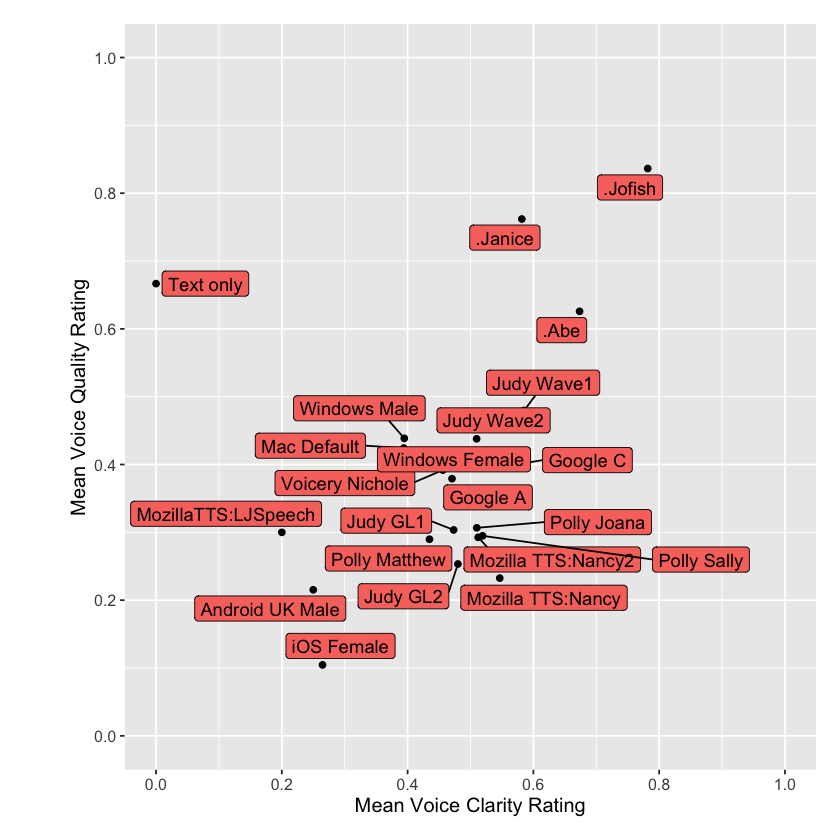

In [17]:
data$voice.factor.understand = rowMeans(data[c('voice.easy','voice.focus')])
data$voice.factor.quality = rowMeans(data[c('voice.natural','voice.monotone','voice.no_emotion')])
temp = merge(aggregate(voice.factor.understand ~ voice, data=data, FUN = "mean"),aggregate(voice.factor.quality ~ voice, data=data, FUN = "mean"),by='voice')
#temp = merge(temp,group_names.voice.type,by.x='voice',by.y=0)


ggplot(temp, aes(x = voice.factor.understand, y = voice.factor.quality, geom_text = voice)) +
  geom_point() + 
  labs(x = "Mean Voice Clarity Rating", y = "Mean Voice Quality Rating") +
  geom_label_repel(aes(label=voice, fill="")) + 
  #facet_wrap( ~ Var2, labeller = as_labeller(c("Good","Poor"))) +
  #theme_classic() + 
  theme(plot.margin=unit(c(.5,.5,.5,1.5),"cm"),
        text = element_text(size=12),
        #axis.text.x = element_text(angle = 30, hjust = 1, vjust = 1),
        #axis.title.y = element_blank(),
        #axis.title.x = element_blank(),
        strip.background = element_blank(),
        panel.spacing = unit(3, "lines"),
        legend.position = "none") +
  guides(fill = guide_legend(title = element_blank())) +
  #scale_colour_brewer(palette = "PRGn") + 
  scale_y_continuous(limits=c(0,1),breaks=seq(0,1,.2)) +
  scale_x_continuous(limits=c(0,1),breaks=seq(0,1,.2))

ggsave("~/Desktop/clarity_vs_quality_9-12-19.pdf",height=6,width=7)